In [95]:
import pandas as pd
import numpy as np
import networkx as nx
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
import warnings

In [96]:
geolocation = pd.read_csv('australian-election-2019-tweets/location_geocode.csv')

Some rows in the geolocation table are emply so they were removed.

In [97]:
geolocation = geolocation.dropna()
geolocation.rename(columns={'name':'user_location'}, inplace=True)

In [100]:
election = pd.read_csv('australian-election-2019-tweets/auspol2019.csv')
election = election[['user_screen_name', 'user_location']]

In [102]:
locationtbl = pd.merge(election, geolocation, on='user_location', how='inner')
locationtbl.head()

,user_screen_name,user_location,lat,long
0,jocksjig,"Brisbane, Queensland",-27.469771,153.025124
1,DrRimmer,"Brisbane, Queensland",-27.469771,153.025124
2,jocksjig,"Brisbane, Queensland",-27.469771,153.025124
3,eneferri,"Brisbane, Queensland",-27.469771,153.025124
4,ShaharHameiri,"Brisbane, Queensland",-27.469771,153.025124


Top 10 tweeters

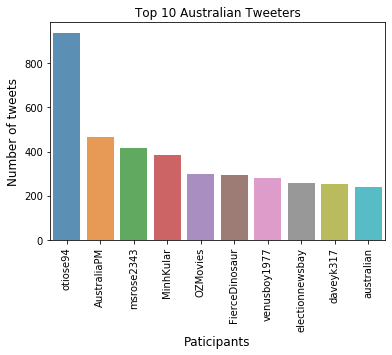

In [103]:
top10 = locationtbl.user_screen_name.value_counts()[:10]
sns.barplot(top10.index, top10.values, alpha=0.8)
plt.title('Top 10 Australian Tweeters')
plt.xticks(rotation='vertical')
plt.ylabel('Number of tweets', fontsize=12)
plt.xlabel('Paticipants', fontsize=12)
plt.show()

This was expected where the top 10 tweets came from Australia iteself.

In [104]:
locationtbl.user_location.value_counts()[:10]

Australia                   18372
Melbourne, Victoria          7404
Sydney, Australia            5689
Sydney, New South Wales      5363
Melbourne, Australia         5274
Sydney                       4971
Melbourne                    4278
Canberra                     3395
Perth, Western Australia     2450
Brisbane, Queensland         2436
Name: user_location, dtype: int64

The map below gives a better visualization of how the tweets were distributed through out the world concerning Australian election.

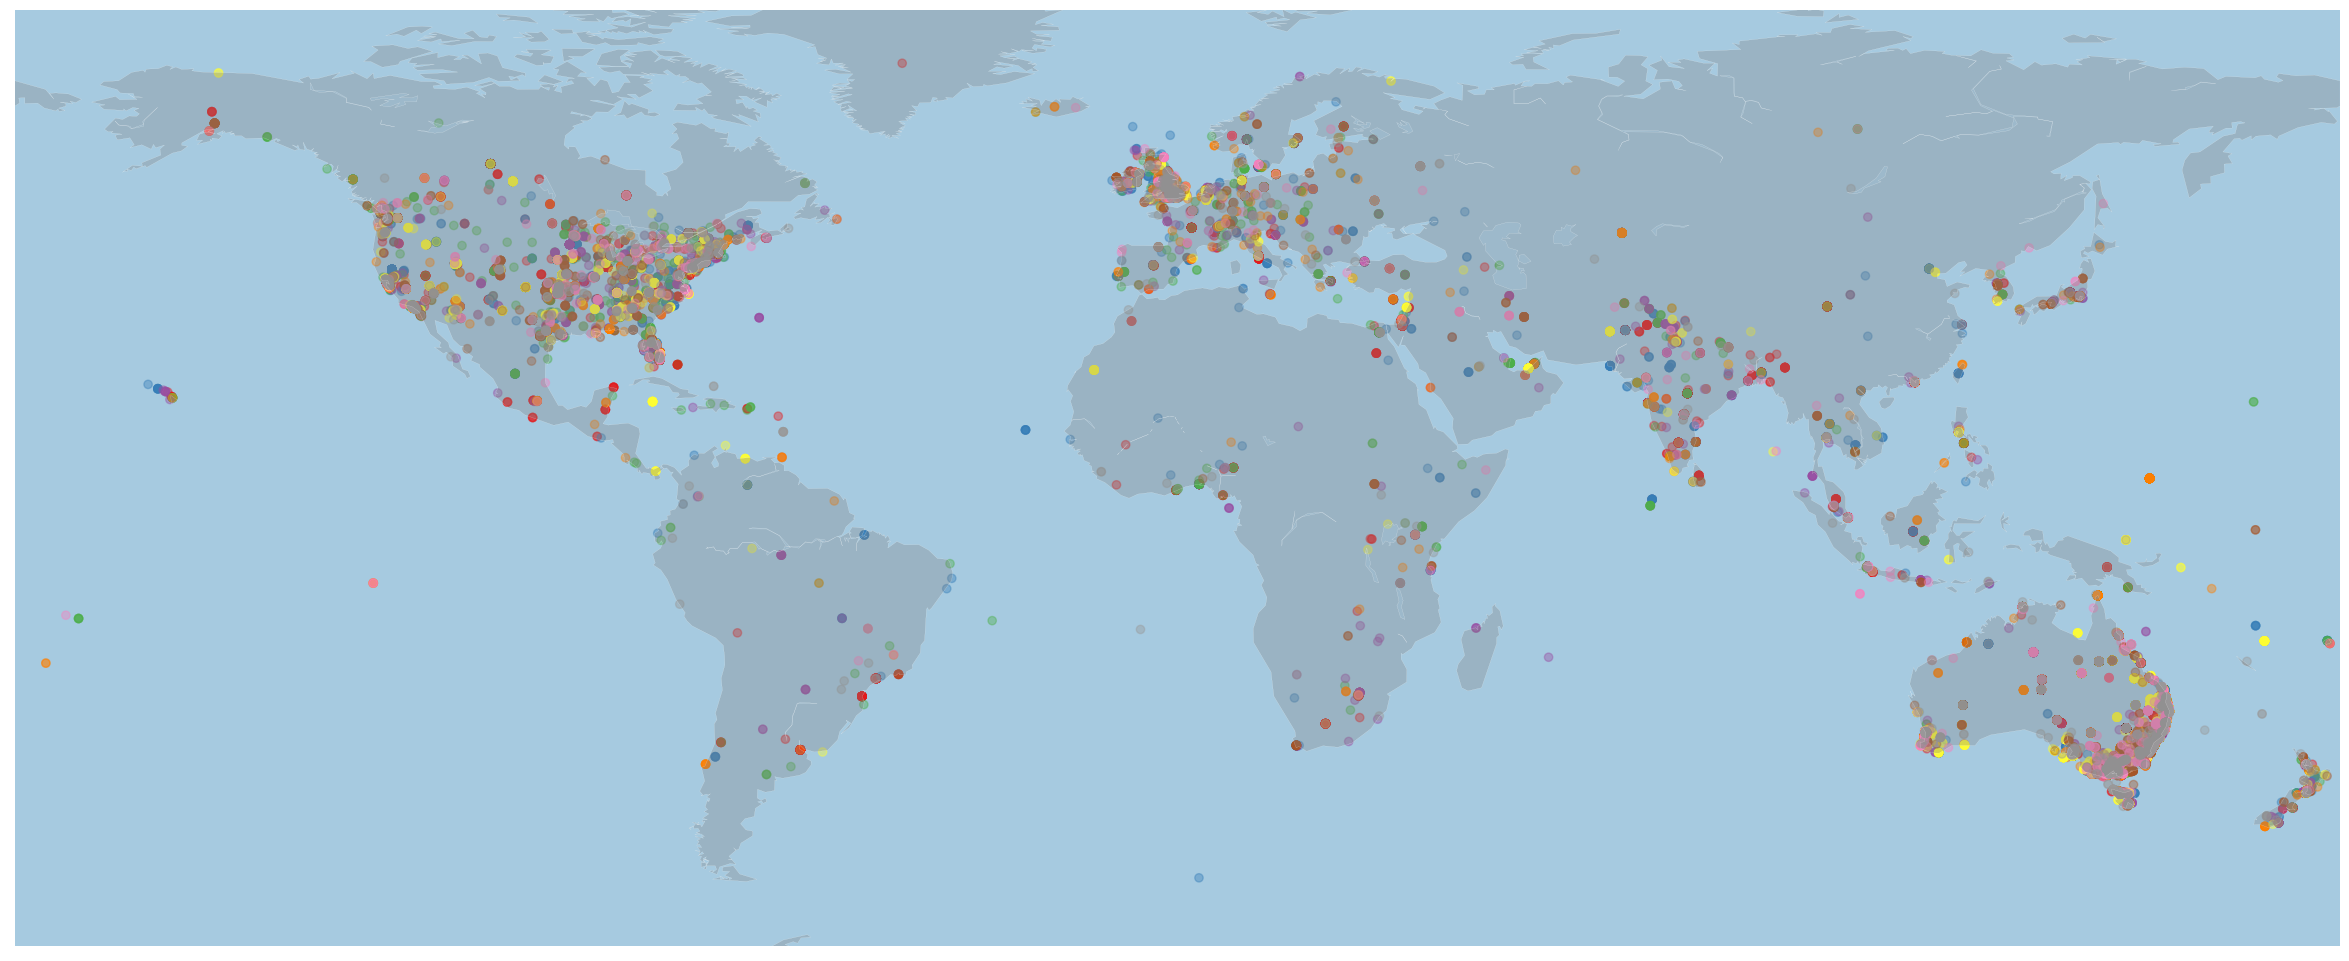

In [105]:
warnings.filterwarnings("ignore")
    
plt.figure(figsize=(30, 20), dpi=100)
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

 
# prepare a color for each point depending on the continent.
locationtbl['labels_enc'] = pd.factorize(locationtbl['user_location'])[0]
 
# Add a point per position
m.scatter(locationtbl['long'], locationtbl['lat'] ,alpha=0.4, c=locationtbl['labels_enc'], cmap="Set1")


### References
- [The Python Graph Gallery](https://python-graph-gallery.com/315-a-world-map-of-surf-tweets/)
- https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
